In [4]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.3, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} $')

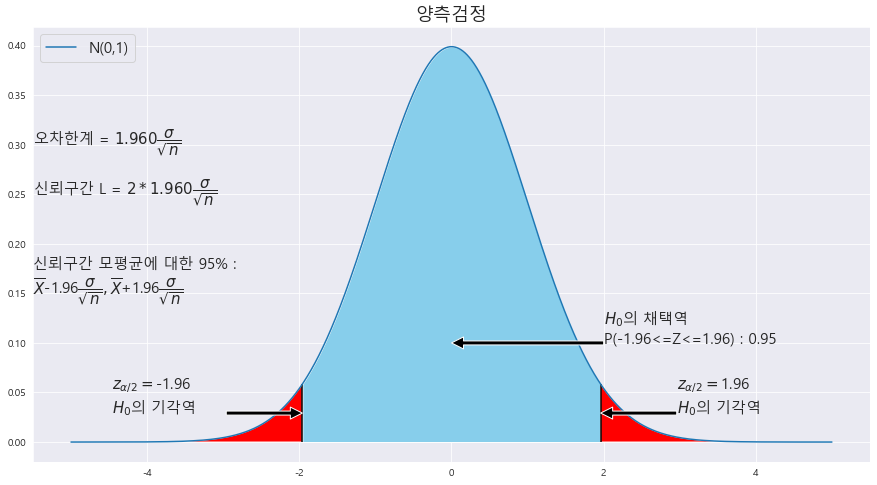

In [7]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도
ax.set_title('양측검정' ,fontsize = 18)
# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) | (x<=-z_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(-1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(1 + z_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{z_1}\n' + r'$H_{0}$의 기각역',fontsize=15)
ax.text(-2.5 - z_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{-z_1}\n' + r'$H_{0}$의 기각역',fontsize=15)



ax.text(2 , .1, r'$H_{0}$의 채택역' +f'\nP({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

# ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ = ' + f'({round(MEANS - z_1*STDS/math.sqrt(n),2)} , {round(MEANS + z_1*STDS/math.sqrt(n),2)})',fontsize=15)
# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % z_1 ,fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % z_1,fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-1.8


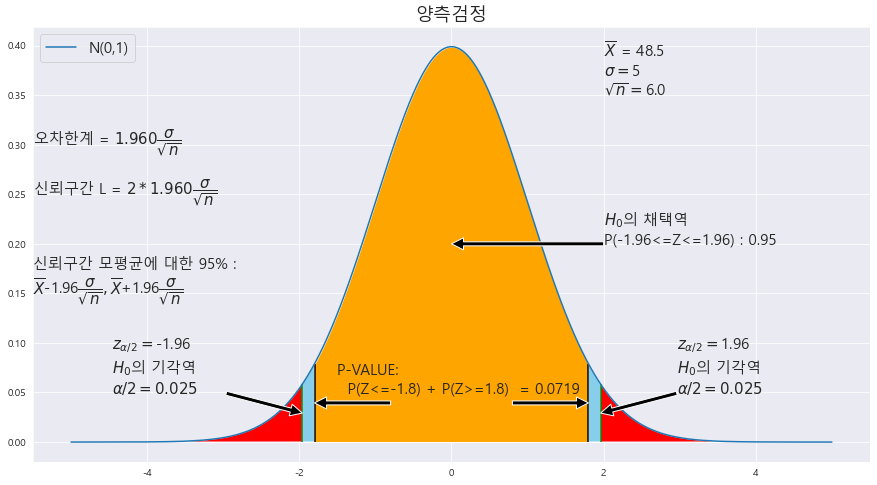

In [23]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도
# MEANS_A = 48.5
# MEANS_B = 50
# MEANS = MEANS_A-MEANS_B
# std_a = 5
# std_b = 5
# n_a = 55
# n_b = 47
# STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)
MEANS = 48.5
STDS = 5
n = 36

ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red')
plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)

ax.text(2 , .35,  r'$\overline{X}$ = ' + f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)
# ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round((MEANS-50)/ math.sqrt(STDS**2/n) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=-z_1) | (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(z_1) + 1- scipy.stats.norm.cdf(-z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(-z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(z_1, annotate_len), xytext=(1+z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P(Z<={z_1}) + P(Z>={-z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.11


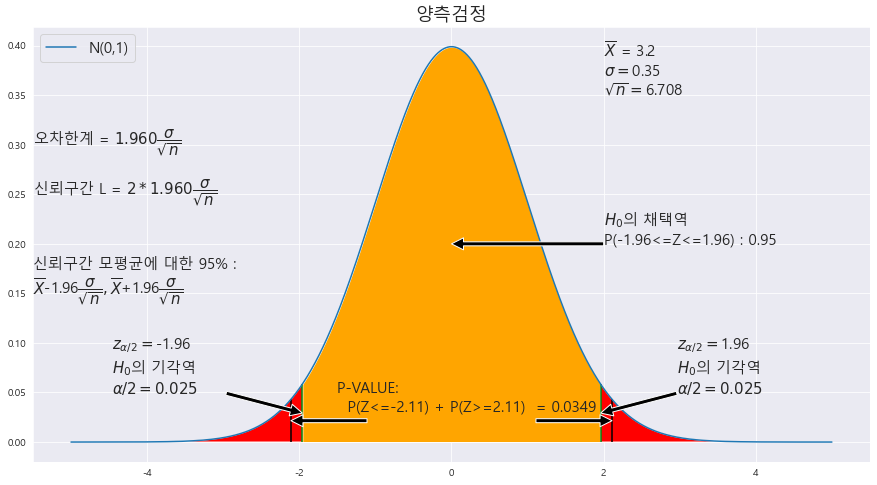

In [27]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도
# MEANS_A = 48.5
# MEANS_B = 50
# MEANS = MEANS_A-MEANS_B
# std_a = 5
# std_b = 5
# n_a = 55
# n_b = 47
# STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)
MEANS = 3.2
STDS = 0.35
n = 45

ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red')
plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)

ax.text(2 , .35,  r'$\overline{X}$ = ' + f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)
# ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round((MEANS-3.09)/ math.sqrt(STDS**2/n) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) | (x<=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-2.7


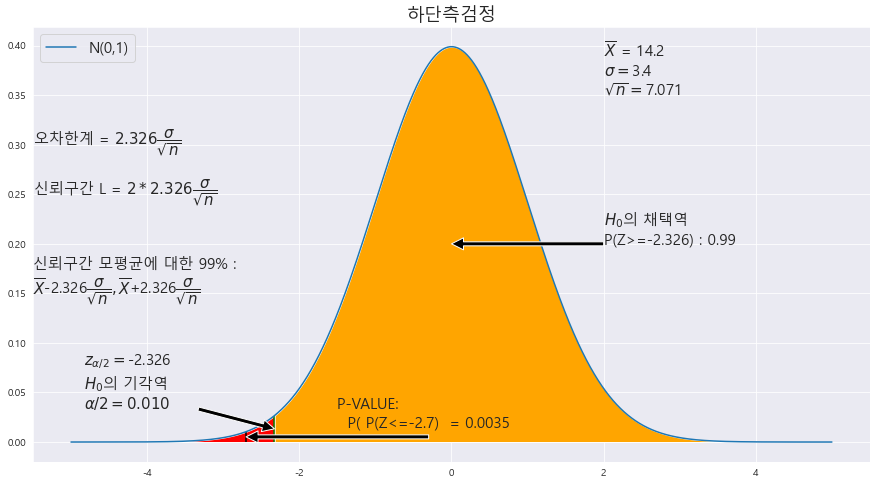

In [42]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도
# MEANS_A = 48.5
# MEANS_B = 50
# MEANS = MEANS_A-MEANS_B
# std_a = 5
# std_b = 5
# n_a = 55
# n_b = 47
# STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)
MEANS = 14.2
STDS = 3.4
n = 50

ax.set_title('하단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 99 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=-t_1)  , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = 1- scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z>={-t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area) ,3)
# ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


# plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)

ax.text(2 , .35,  r'$\overline{X}$ = ' + f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)
# ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round((MEANS-15.5)/ math.sqrt(STDS**2/n) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
#
# z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area =  scipy.stats.norm.cdf(z_1)


# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=( -3 - z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P( P(Z<={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.27


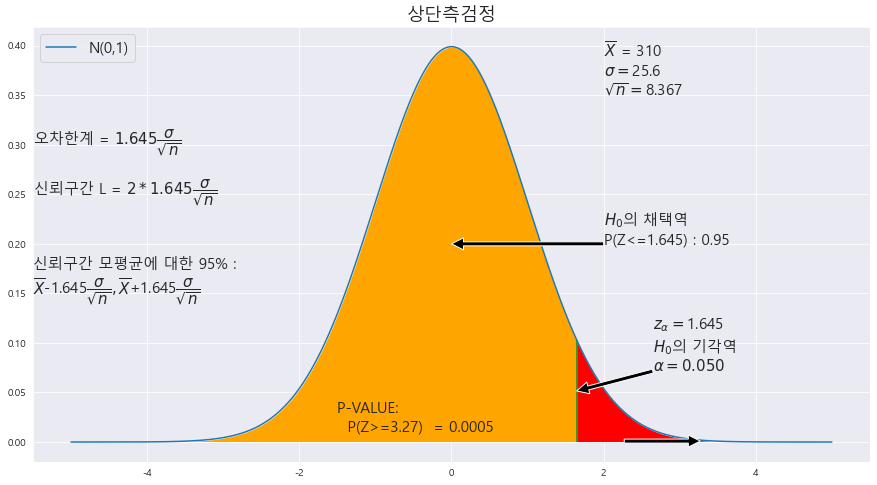

In [47]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도
# MEANS_A = 48.5
# MEANS_B = 50
# MEANS = MEANS_A-MEANS_B
# std_a = 5
# std_b = 5
# n_a = 55
# n_b = 47
# STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)
MEANS = 310
STDS = 25.6
n = 70

ax.set_title('상단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1)  , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area) ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha = {%.3f}$' % area,fontsize=15)
# ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)

ax.text(2 , .35,  r'$\overline{X}$ = ' + f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)
# ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round((MEANS-300)/ math.sqrt(STDS**2/n) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)

z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area =  1- scipy.stats.norm.cdf(z_1)


# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-1.97


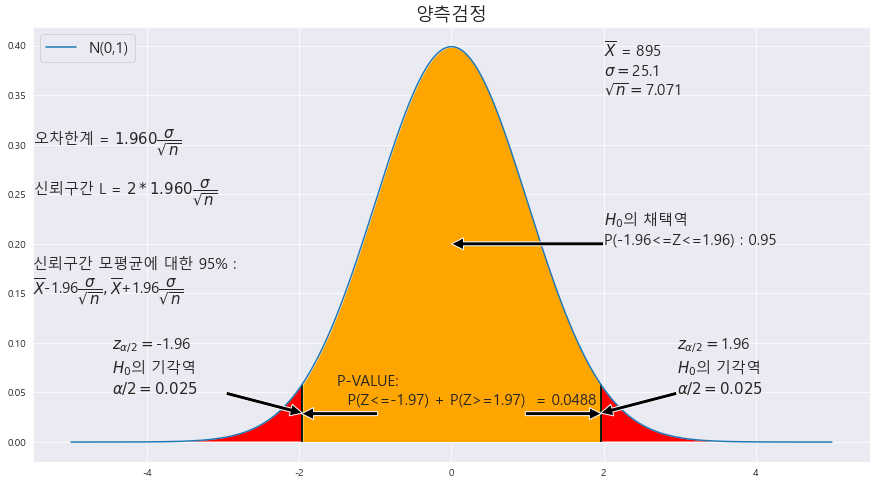

In [51]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도
# MEANS_A = 48.5
# MEANS_B = 50
# MEANS = MEANS_A-MEANS_B
# std_a = 5
# std_b = 5
# n_a = 55
# n_b = 47
# STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)
MEANS = 895
STDS = 25.1
n = 50

ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red')
plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)

ax.text(2 , .35,  r'$\overline{X}$ = ' + f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)
# ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round((MEANS-902)/ math.sqrt(STDS**2/n) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)

z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) | (x<=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-1.6


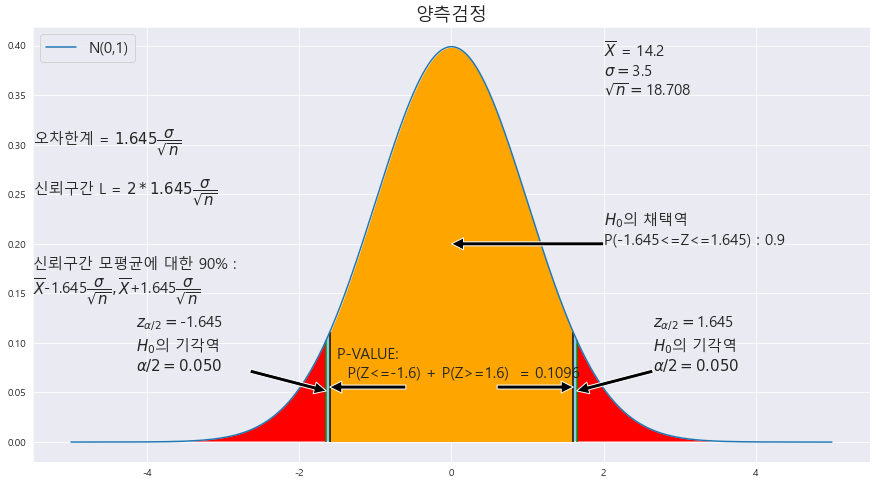

In [52]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도
# MEANS_A = 48.5
# MEANS_B = 50
# MEANS = MEANS_A-MEANS_B
# std_a = 5
# std_b = 5
# n_a = 55
# n_b = 47
# STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)
MEANS = 14.2
STDS = 3.5
n = 350

ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 90 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red')
plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)

ax.text(2 , .35,  r'$\overline{X}$ = ' + f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)
# ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round((MEANS-14.5)/ math.sqrt(STDS**2/n) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)

z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) | (x<=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-2.16


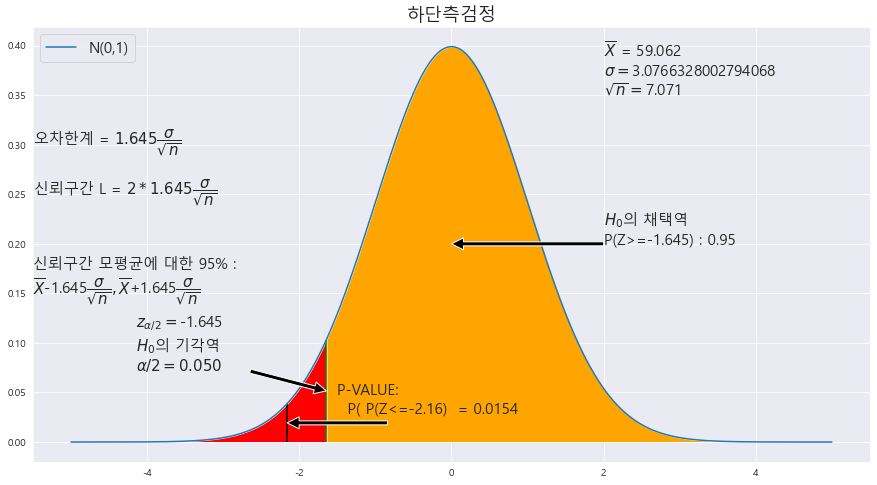

In [58]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도
A = "56.7 64.0 58.2 60.4 63.7 58.0 55.1 54.3 57.8 63.1 61.6 63.2 54.3 54.2 56.2 63.4 57.7 54.2 55.4 60.3 60.2 54.1 60.1 57.1 57.2 61.9 63.2 59.6 60.1 62.1 61.2 56.0 55.9 54.8 58.1 61.5 61.7 61.2 55.8 59.0 62.9 63.9 59.3 60.9 59.0 58.7 61.4 61.8 54.9 57.7"
A = list(map(float, A.split(' ')))
MEANS = np.mean(A)
STDS = np.std(A , ddof=1)
n = len(A)

ax.set_title('하단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=-t_1)  , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = 1- scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z>={-t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area) ,3)
# ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


# plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)

ax.text(2 , .35,  r'$\overline{X}$ = ' + f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)
# ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round((MEANS-60)/ math.sqrt(STDS**2/n) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
#
# z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area =  scipy.stats.norm.cdf(z_1)


# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=( -3 - z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P( P(Z<={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.71


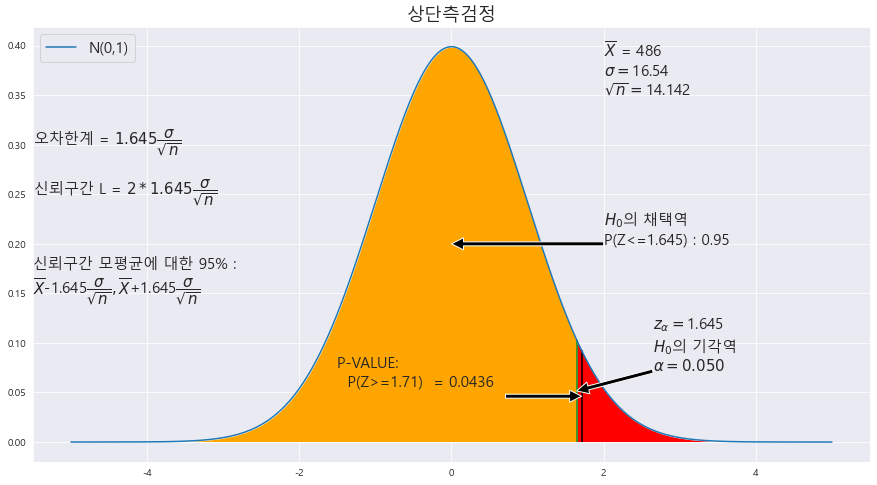

In [59]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도
# MEANS_A = 48.5
# MEANS_B = 50
# MEANS = MEANS_A-MEANS_B
# std_a = 5
# std_b = 5
# n_a = 55
# n_b = 47
# STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)
MEANS = 486
STDS = 16.54
n = 200

ax.set_title('상단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1)  , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area) ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha = {%.3f}$' % area,fontsize=15)
# ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)

ax.text(2 , .35,  r'$\overline{X}$ = ' + f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)
# ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round((MEANS-484)/ math.sqrt(STDS**2/n) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)

z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area =  1- scipy.stats.norm.cdf(z_1)


# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-2.07


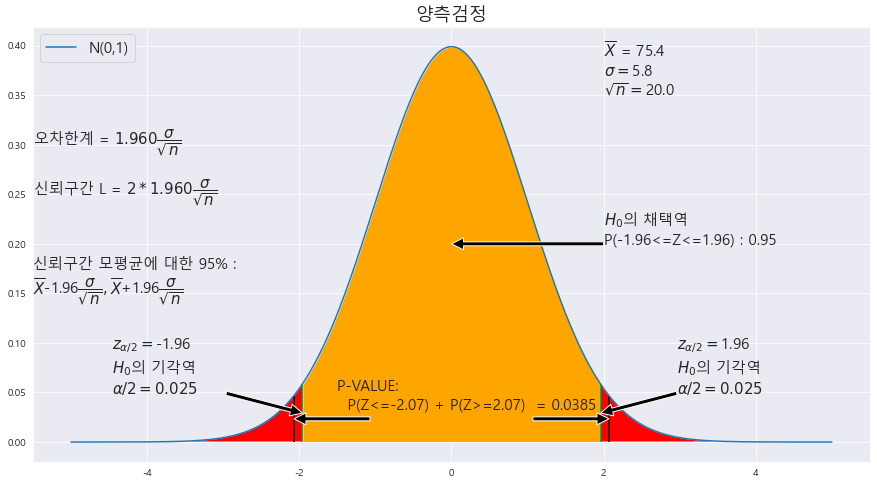

In [61]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도
# MEANS_A = 48.5
# MEANS_B = 50
# MEANS = MEANS_A-MEANS_B
# std_a = 5
# std_b = 5
# n_a = 55
# n_b = 47
# STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)
MEANS = 75.4
STDS = 5.8
n = 400

ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red')
plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{t_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)

ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)

ax.text(2 , .35,  r'$\overline{X}$ = ' + f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)
# ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round((MEANS-76)/ math.sqrt(STDS**2/n) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)

z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) | (x<=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')
